# How to Read in Your CanSat Data Using Python!
### By Cee @ Magnitude
How to use this notebook: Download this file on your computer and open it in Jupyter Notebook. Hit Shift + Enter to run each individual cell of code

#### 1. First we need to load our packages (and nickname them!)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### 2. Next we need to upload our data file. 
Replace the name of this file with the name of your file, it should end in .txt. I skipped the first 106 rows because the Cansat was started and stopped a couple of times. Possibly open your file in Excel spreadsheets and skip any rows that have a "header", which describes what the data set is about. Our data is stored in columns 1-16. 

In [3]:
data = np.loadtxt('20181025-MillswoodHAB.txt', skiprows = 106, delimiter =',', usecols = (1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16))


#### 3. We want to name each column of our data. 
Check the header in the spreadsheet to see which it which. For my data, CO2 data was in the first (0th) column, so I want to index "data" , use all the rows [ :  , and then take only the 0th column]. 

In [3]:
CO2 = data[:,0]
th02Temp = data[:,1]
humidity = data[:,2]
bmp280Temp = data[:,3]
pressure = data[:,4]
altitude = data[:,5]
lux = data[:,6]
accel_x = data[:,7]
accel_y = data[:,8]
accel_z = data[:,9]
mag_x = data[:,10]
mag_y = data[:,11]
mag_z = data[:,12]
gps_lat = data[:,13]
gps_lon = data[:,14]
gps_alt = data[:,15]

#### 4. Load the column that has our timestamp
Our timestamp is stored in column #1, which in Python is column #0. I'm loading it as a "string", not a number, because it's in a weird format. To get rid of that formatting, for every timestamp I call the datetime.strptime package to convert it into time. I take only the hours, minutes, and seconds portion of the timestamp, which is everything after position [11: ]

In [4]:
timestamp = np.loadtxt('20181025-MillswoodHAB.txt', skiprows = 106, delimiter = ',', usecols = (0), dtype=str)
times = []
for i in range(len(timestamp)):
    times.append(datetime.datetime.strptime(timestamp[i][11:], '%H:%M:%S'))

#### 5. Now that we have our data and our times, lets plot stuff! 

calling the "plt" package, I want to plot times vs accel_z. You can plot any two things against each other, but first it's cool to plot your data against time to see what was going on throughout the flight.

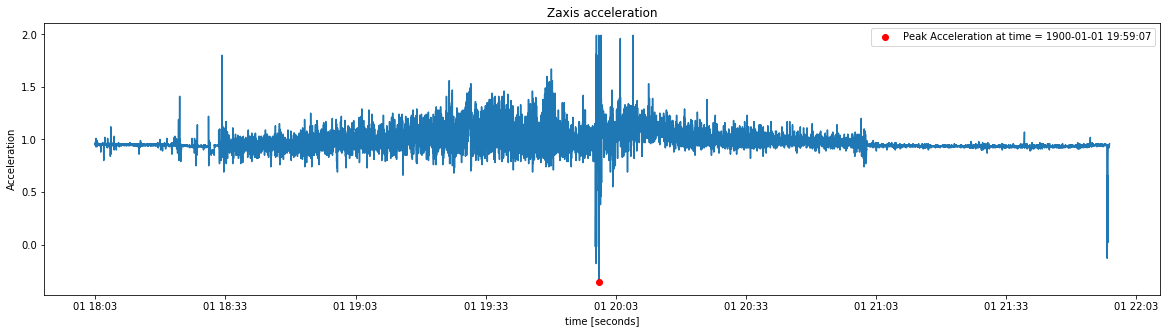

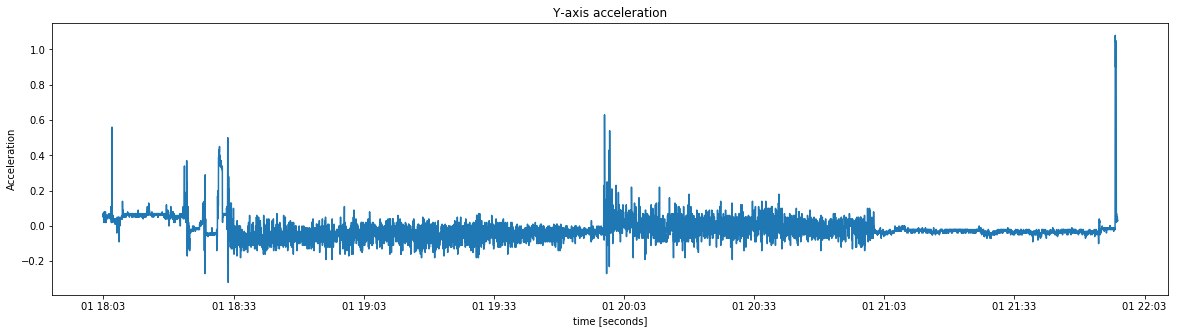

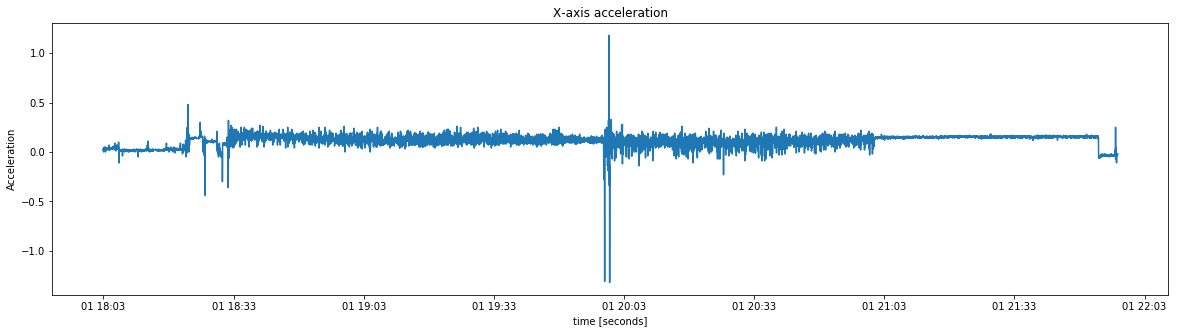

In [217]:
#Track balloon launch, pop, and landing

plt.figure(figsize=(20,5))
plt.plot(times, accel_z)
plt.plot(times[np.argmin(accel_z)], np.min(accel_z), 'ro', label = 'Peak Acceleration at time = ' + np.str(times[np.argmin(accel_z)]))
plt.xlabel('time [seconds]')
plt.ylabel('Acceleration')
plt.title('Zaxis acceleration')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, accel_y)
plt.xlabel('time [seconds]')
plt.ylabel('Acceleration')
plt.title('Y-axis acceleration')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, accel_x)
plt.xlabel('time [seconds]')
plt.ylabel('Acceleration')
plt.title('X-axis acceleration')
plt.show()

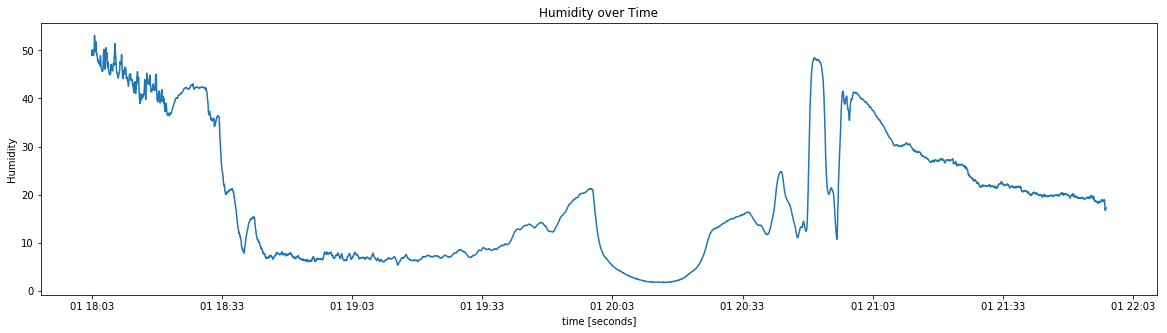

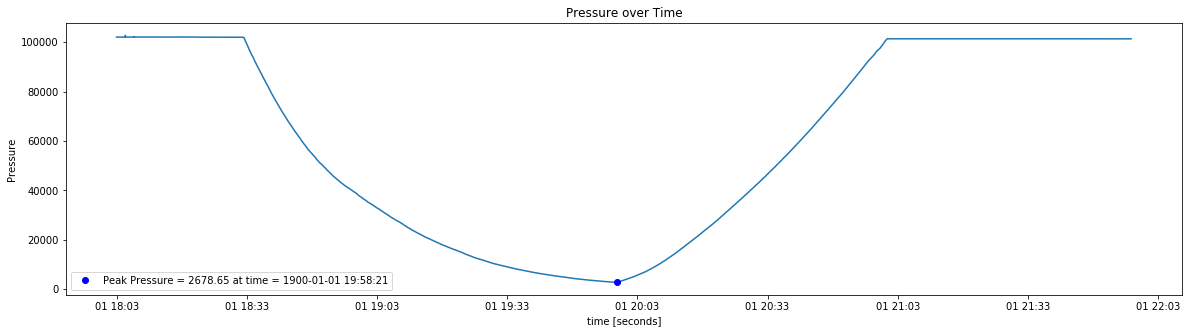

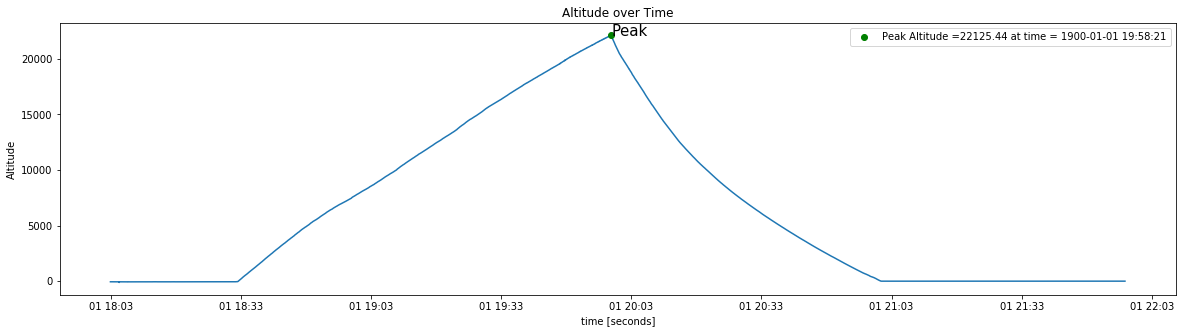

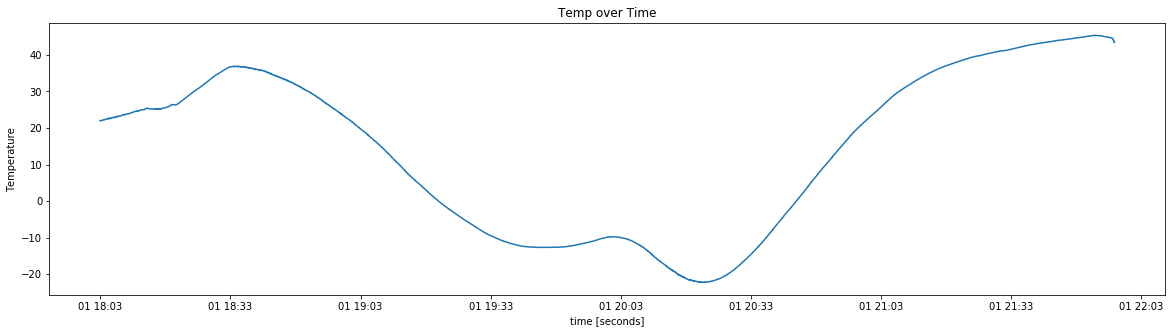

In [227]:
#Environmental sensors

plt.figure(figsize=(20,5))
plt.plot(times, humidity)
plt.xlabel('time [seconds]')
plt.ylabel('Humidity')
plt.title('Humidity over Time')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, pressure)
plt.plot(times[np.argmin(pressure)], np.min(pressure), 'bo', label = 'Peak Pressure = ' + np.str(np.min(pressure)) + ' at time = ' + np.str(times[np.argmin(pressure)]))
plt.xlabel('time [seconds]')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, altitude)
plt.plot(times[np.argmax(altitude)], np.max(altitude), 'go', label = 'Peak Altitude =' + np.str(np.max(altitude)) + ' at time = ' + np.str(times[np.argmax(altitude)]))
plt.text(times[np.argmax(altitude)], np.max(altitude), 'Peak', size= 15)
plt.xlabel('time [seconds]')
plt.ylabel('Altitude')
plt.title('Altitude over Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, bmp280Temp)
plt.xlabel('time [seconds]')
plt.ylabel('Temperature')
plt.title('Temp over Time')
plt.show()

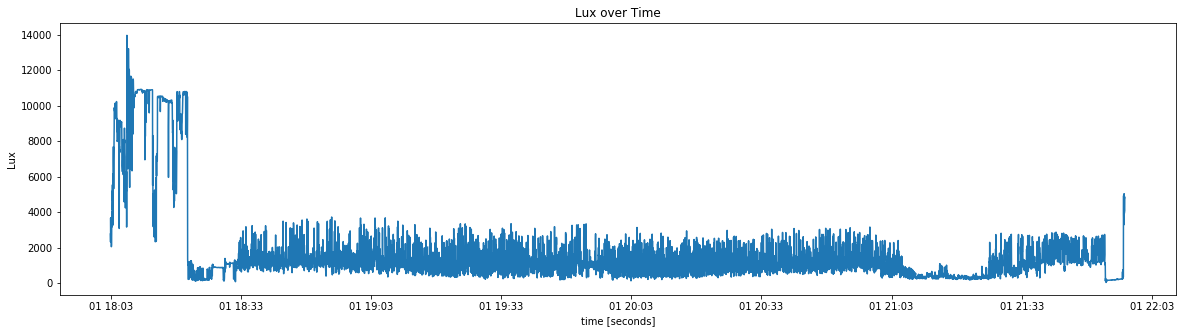

In [172]:
plt.figure(figsize=(20,5))
plt.plot(times, lux)
plt.xlabel('time [seconds]')
plt.ylabel('Lux')
plt.title('Lux over Time')
plt.show()

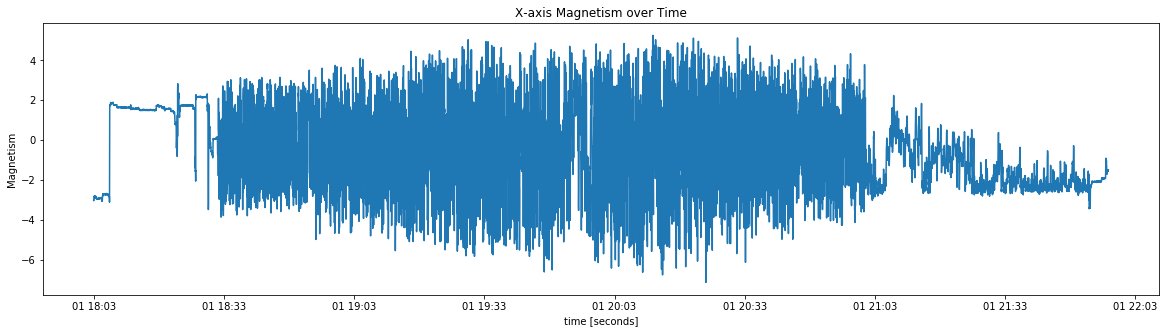

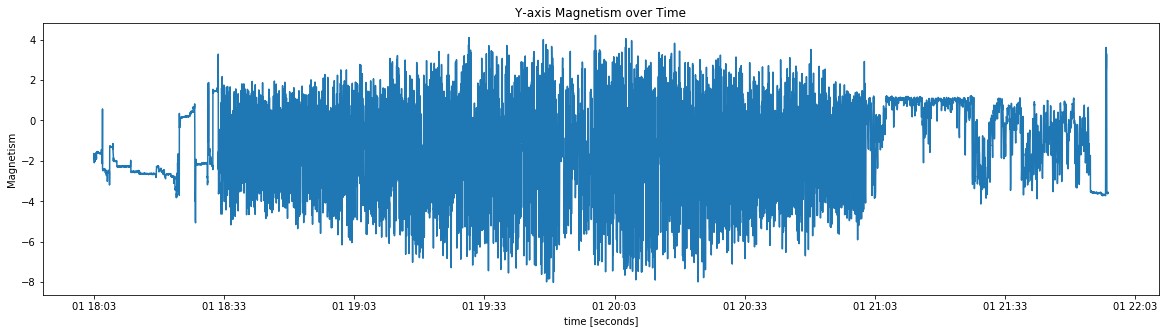

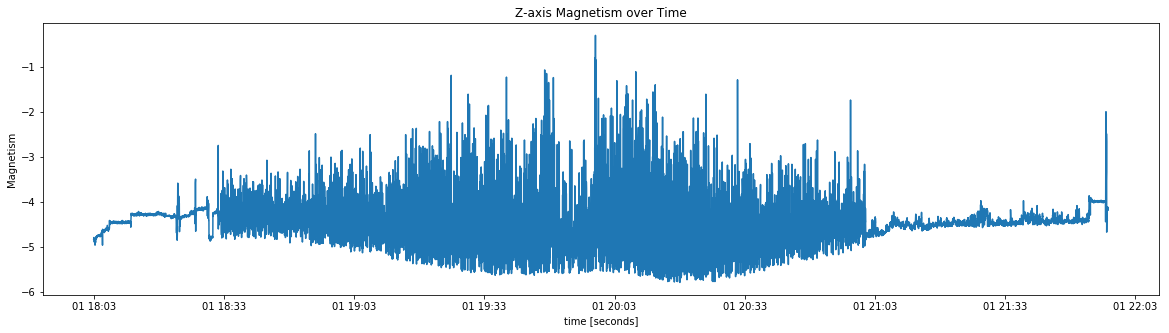

In [189]:
plt.figure(figsize=(20,5))
plt.plot(times, mag_x)
plt.xlabel('time [seconds]')
plt.ylabel('Magnetism')
plt.title('X-axis Magnetism over Time')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, mag_y)
plt.xlabel('time [seconds]')
plt.ylabel('Magnetism')
plt.title('Y-axis Magnetism over Time')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, mag_z)
plt.xlabel('time [seconds]')
plt.ylabel('Magnetism')
plt.title('Z-axis Magnetism over Time')
plt.show()

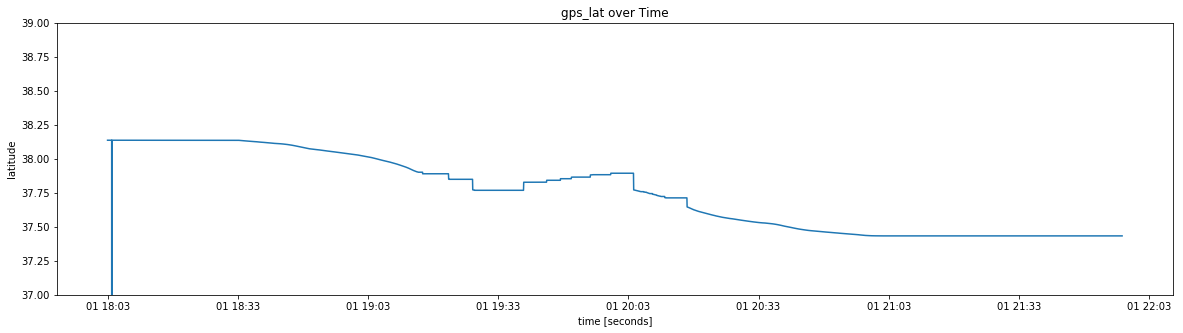

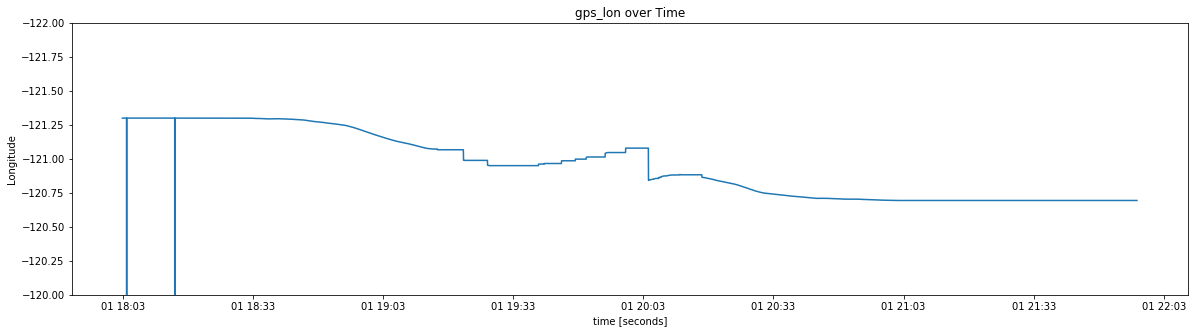

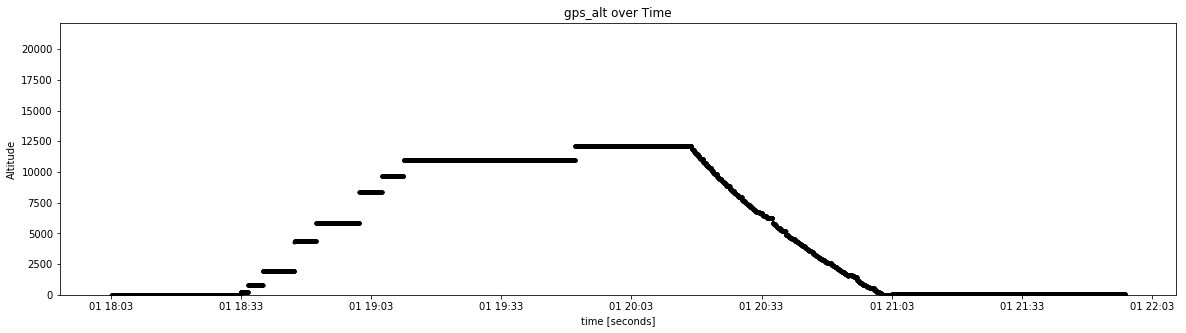

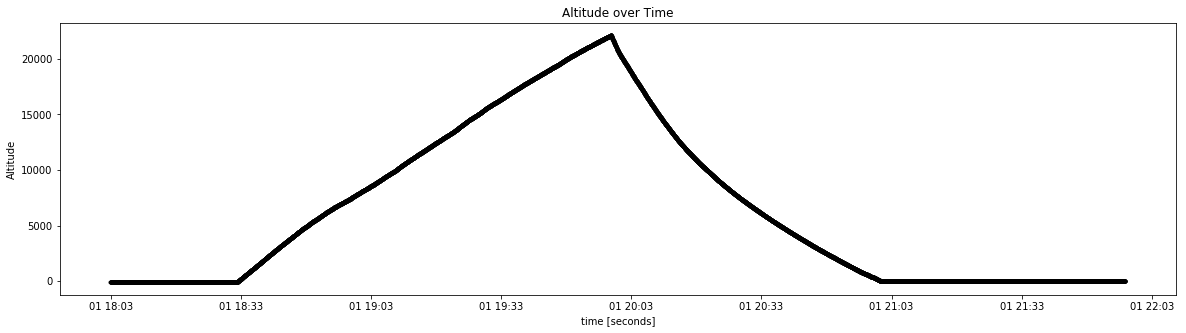

22125.44 4662


In [204]:
plt.figure(figsize=(20,5))
plt.plot(times, gps_lat)
plt.xlabel('time [seconds]')
plt.ylabel('latitude')
plt.title('gps_lat over Time')
plt.ylim(37,39)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, gps_lon)
plt.xlabel('time [seconds]')
plt.ylabel('Longitude')
plt.title('gps_lon over Time')
plt.ylim(-120,-122)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, gps_alt, 'k.')
plt.xlabel('time [seconds]')
plt.ylabel('Altitude')
plt.title('gps_alt over Time')
plt.ylim(-1, np.max(altitude))
plt.show()

plt.figure(figsize=(20,5))
plt.plot(times, altitude, 'k.')
plt.xlabel('time [seconds]')
plt.ylabel('Altitude')
plt.title('Altitude over Time')
plt.show()

print(np.max(altitude), np.argmax(altitude))